In [1]:
import pandas as pd 
import numpy as np
from numpy import sqrt as ra
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv ("Iris_.csv")
data.head(10)

petal_length  petal_width  species
0           1.4          0.2        0
1           1.4          0.2        0
2           1.3          0.2        0
3           1.5          0.2        0
4           1.4          0.2        0
5           1.7          0.4        0
6           1.4          0.3        0
7           1.5          0.2        0
8           1.4          0.2        0
9           1.5          0.1        0

In [3]:
data.species.unique()

array([0, 1, 2])

La base Iris est composée de 3 colonnes, une première qui concerne la longueur des pétales, une seconde la largeur et une dernière qui est l'espèce.    

Pour les "species" on en a 3 types d'iris différentes,  

"0" = setosa,    

"1" = virginica,    

"2" = versicolor

In [4]:
data.describe()

petal_length  petal_width     species
count    150.000000   150.000000  150.000000
mean       3.758667     1.198667    1.000000
std        1.764420     0.763161    0.819232
min        1.000000     0.100000    0.000000
25%        1.600000     0.300000    0.000000
50%        4.350000     1.300000    1.000000
75%        5.100000     1.800000    2.000000
max        6.900000     2.500000    2.000000


Faisons maintenant la représentation graphique pour voir notre base de données

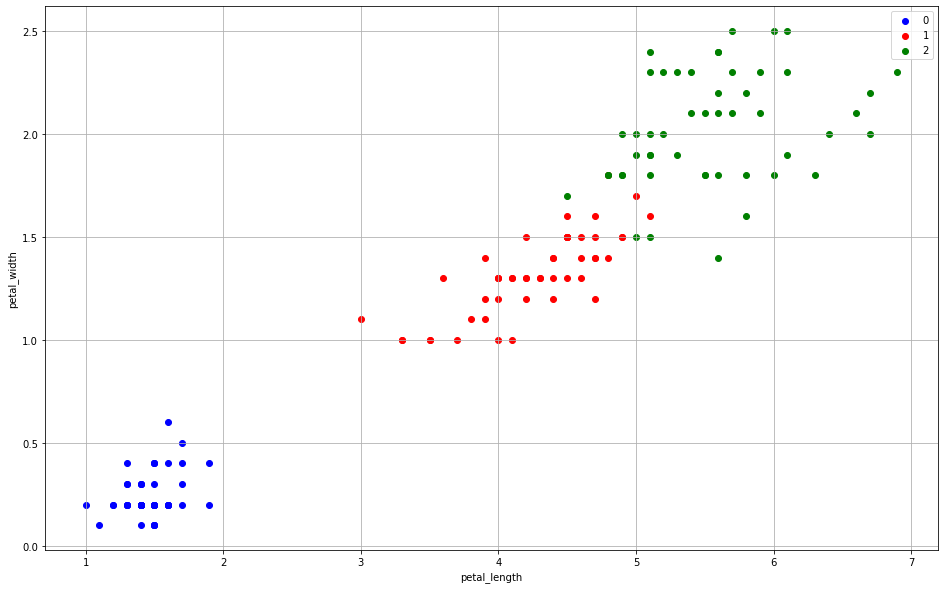

In [5]:
# Affectations des variables

x = data.loc[:, "petal_length"]
y = data.loc[:, "petal_width"]
labels = data.loc[:, "species"]

plt.figure(figsize = (16, 10))

plt.scatter (x[labels == 0], y[labels == 0], c = 'b', label = 0)
plt.scatter (x[labels == 1], y[labels == 1], c = 'r', label = 1)
plt.scatter (x[labels == 2], y[labels == 2], c = 'g', label = 2)

plt.grid()
plt.xlabel ("petal_length")
plt.ylabel ("petal_width")
plt.legend()
plt.show()

La méthode des KNN consiste à attribuer à une nouvelle donnée une appartenance par exemple on une var de coordonnées (x, y), l'algo va donc déterminer si elle appartient à la classe 0, 1 ou 2.


Nous allons changer le label en texte.

In [6]:
#data.loc[data["species"] == 0, "species"] = "setosa"
#data.loc[data["species"] == 1, "species"] = "virginica"
#data.loc[data["species"] == 2, "species"] = "versicolor"
#data


regardons la distribution de la variable species avec les deux autres variables

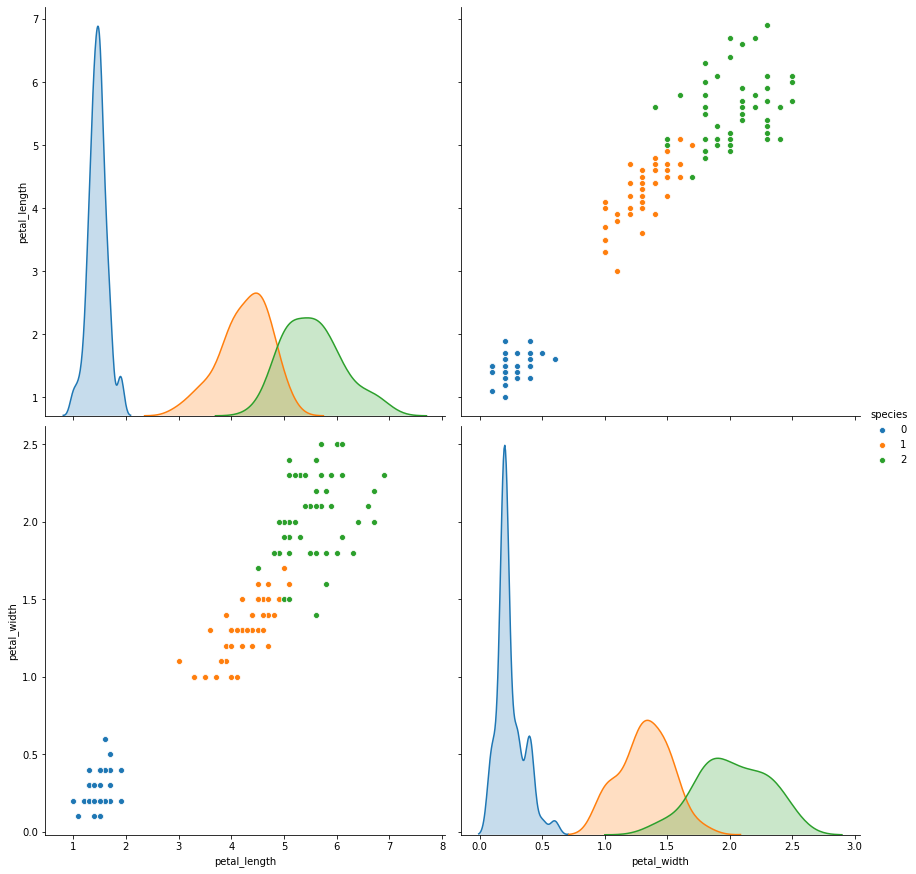

In [7]:
sns.pairplot(data, hue = "species", height = 6)

In [8]:
X = data.drop(data.columns[2], axis = 1)
Y = data["species"]
X

petal_length  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
..            ...          ...
145           5.2          2.3
146           5.0          1.9
147           5.2          2.0
148           5.4          2.3
149           5.1          1.8

[150 rows x 2 columns]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

        
                                Maintenant on va entrainer notre modèle

In [10]:
classifier = KNeighborsClassifier(n_neighbors=3)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [11]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [12]:
print ("le score de notre jeu de test est de ", (accuracy_score(y_test, y_pred)*100).round(2),"%")

le score de notre jeu de test est de  97.78 %


Optimisons notre modèle maintenant pour avoir notre erreur de classification

In [13]:
K = list(range(1,60,2))
Scores = []

for k in K:
    knn = KNeighborsClassifier (n_neighbors = k)
    scores = cross_val_score (knn, X_train, y_train, cv = 10, scoring = "accuracy")
    Scores.append(scores.round(2))
    
Scores

[array([0.91, 0.91, 0.91, 1.  , 1.  , 1.  , 1.  , 0.8 , 1.  , 0.9 ]),
 array([0.91, 0.91, 0.91, 0.91, 1.  , 1.  , 1.  , 0.7 , 1.  , 0.9 ]),
 array([0.91, 0.91, 0.91, 1.  , 1.  , 1.  , 1.  , 0.9 , 1.  , 0.9 ]),
 array([0.91, 1.  , 0.91, 1.  , 1.  , 1.  , 1.  , 0.9 , 1.  , 0.9 ]),
 array([0.91, 1.  , 0.91, 1.  , 1.  , 1.  , 1.  , 0.9 , 1.  , 0.9 ]),
 array([1.  , 1.  , 0.91, 1.  , 1.  , 1.  , 1.  , 0.9 , 1.  , 0.9 ]),
 array([1.  , 1.  , 0.91, 1.  , 1.  , 1.  , 1.  , 0.9 , 1.  , 0.9 ]),
 array([1.  , 1.  , 0.91, 1.  , 1.  , 1.  , 1.  , 0.9 , 1.  , 0.9 ]),
 array([1.  , 1.  , 0.91, 1.  , 1.  , 1.  , 1.  , 0.9 , 1.  , 0.9 ]),
 array([1.  , 1.  , 0.91, 1.  , 1.  , 1.  , 1.  , 0.9 , 1.  , 0.9 ]),
 array([1.  , 1.  , 0.91, 1.  , 1.  , 1.  , 1.  , 0.9 , 1.  , 0.9 ]),
 array([1.  , 1.  , 0.91, 1.  , 1.  , 1.  , 1.  , 0.9 , 1.  , 0.9 ]),
 array([0.91, 1.  , 0.91, 1.  , 1.  , 1.  , 1.  , 0.9 , 1.  , 0.9 ]),
 array([1.  , 1.  , 0.91, 1.  , 1.  , 1.  , 1.  , 0.9 , 1.  , 0.9 ]),
 array([1.  , 1.  , 

On fait maintenant la moyenne pour chaque ligne 

In [14]:
K = list(range(1,60,2))
Scores = []

for k in K:
    knn = KNeighborsClassifier (n_neighbors = k)
    scores = cross_val_score (knn, X_train, y_train, cv = 10, scoring = "accuracy")
    Scores.append(scores.round(2).mean().round(3))
    
Scores

[0.943,
 0.924,
 0.953,
 0.962,
 0.962,
 0.971,
 0.971,
 0.971,
 0.971,
 0.971,
 0.971,
 0.971,
 0.962,
 0.971,
 0.971,
 0.971,
 0.971,
 0.971,
 0.971,
 0.971,
 0.962,
 0.952,
 0.971,
 0.952,
 0.952,
 0.943,
 0.925,
 0.916,
 0.916,
 0.773]

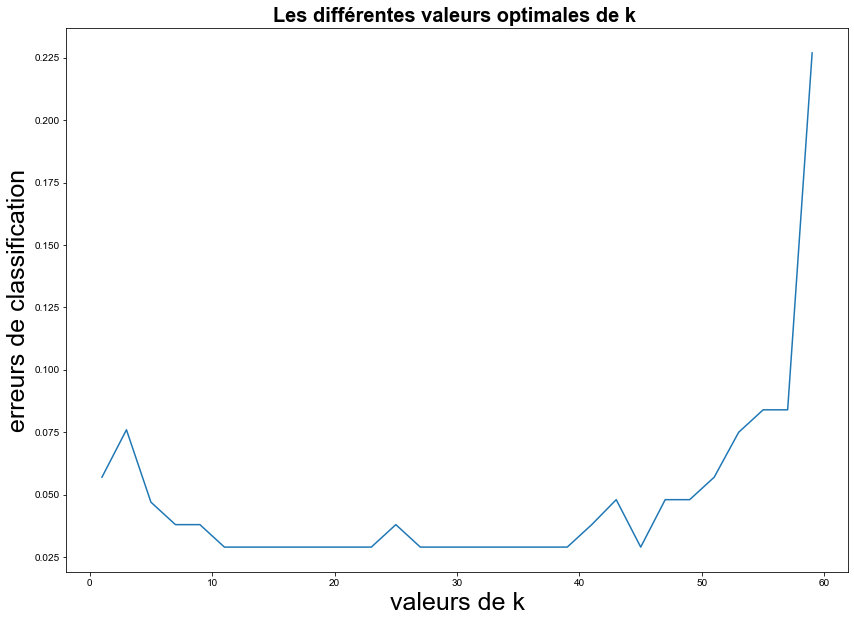

In [15]:
plt.figure (figsize =(14, 10))

erreurs = [1 - i for i in Scores]
plt.plot(K, erreurs)
plt.title ("Les différentes valeurs optimales de k ", fontsize=20, fontweight='bold')
plt.xlabel ("valeurs de k", fontsize = 25)
plt.ylabel ("erreurs de classification", fontsize = 25)
sns.set_style("whitegrid")

plt.show()

Quel est le meilleur K ?

In [16]:
k_ = K[erreurs.index(min(erreurs))]
k_

11

K_neighbors = 11 est le meilleur paramètre